# Survival analysis with normalized enrichment scores for gene sets from KEGG

In [9]:
from collections import defaultdict
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from sksurv.nonparametric import kaplan_meier_estimator

from tqdm import tqdm

from pathway_forte.constants import *
from pathway_forte.gsea import *
from pathway_forte.regression import *
from pathway_forte.survival_analysis import *

In [2]:
# BRCA dataset
BRCA_CLINICAL_DATA = os.path.join(DATA,'tcga_datasets','brca','brca_tcga_clinical_data.tsv')
BRCA_SSGSEA_NES = os.path.join(KEGG_SSGSEA,'kegg_brca.tsv')
BRCA_NORMAL_SAMPLES = NORMAL_EXPRESSION_SAMPLES.format('brca')

# LIHC dataset
LIHC_CLINICAL_DATA = os.path.join(DATA,'tcga_datasets','lihc','lihc_tcga_clinical_data.tsv')
LIHC_SSGSEA_NES = os.path.join(KEGG_SSGSEA,'kegg_lihc.tsv')
LIHC_NORMAL_SAMPLES = NORMAL_EXPRESSION_SAMPLES.format('lihc')

# PRAD dataset
PRAD_CLINICAL_DATA = os.path.join(DATA,'tcga_datasets','prad','prad_tcga_clinical_data.tsv')
PRAD_SSGSEA_NES = os.path.join(KEGG_SSGSEA,'kegg_prad.tsv')
PRAD_NORMAL_SAMPLES = NORMAL_EXPRESSION_SAMPLES.format('prad')

# KIRC dataset
KIRC_CLINICAL_DATA = os.path.join(DATA,'tcga_datasets','kirc','kirc_tcga_clinical_data.tsv')
KIRC_SSGSEA_NES = os.path.join(KEGG_SSGSEA,'kegg_kirc.tsv')
KIRC_NORMAL_SAMPLES = NORMAL_EXPRESSION_SAMPLES.format('kirc')


In [3]:
# Get number of healthy samples in dataset
brca_normal_sample_size = get_num_samples(BRCA_NORMAL_SAMPLES)
lihc_normal_sample_size = get_num_samples(LIHC_NORMAL_SAMPLES)
prad_normal_sample_size = get_num_samples(PRAD_NORMAL_SAMPLES)
kirc_normal_sample_size = get_num_samples(KIRC_NORMAL_SAMPLES)

In [4]:
brca_filtered_ssgsea_df, brca_event_time_array = prepare_ssgsea_data_for_survival_analysis(BRCA_SSGSEA_NES, BRCA_CLINICAL_DATA, brca_normal_sample_size)
lihc_filtered_ssgsea_df, lihc_event_time_array = prepare_ssgsea_data_for_survival_analysis(LIHC_SSGSEA_NES, LIHC_CLINICAL_DATA, lihc_normal_sample_size)
prad_filtered_ssgsea_df, prad_event_time_array = prepare_ssgsea_data_for_survival_analysis(PRAD_SSGSEA_NES, PRAD_CLINICAL_DATA, prad_normal_sample_size)
kirc_filtered_ssgsea_df, kirc_event_time_array = prepare_ssgsea_data_for_survival_analysis(KIRC_SSGSEA_NES, KIRC_CLINICAL_DATA, kirc_normal_sample_size)

In [5]:
lihc_filtered_ssgsea_df.shape

(370, 311)

In [7]:
brca_event_time_array


array([( True, 33.97), ( True, 23.23), ( True,  0.79), ...,
       ( True, 42.31), ( True, 25.  ), (False,  5.19)],
      dtype=[('status', '?'), ('overall_survival_months', '<f8')])

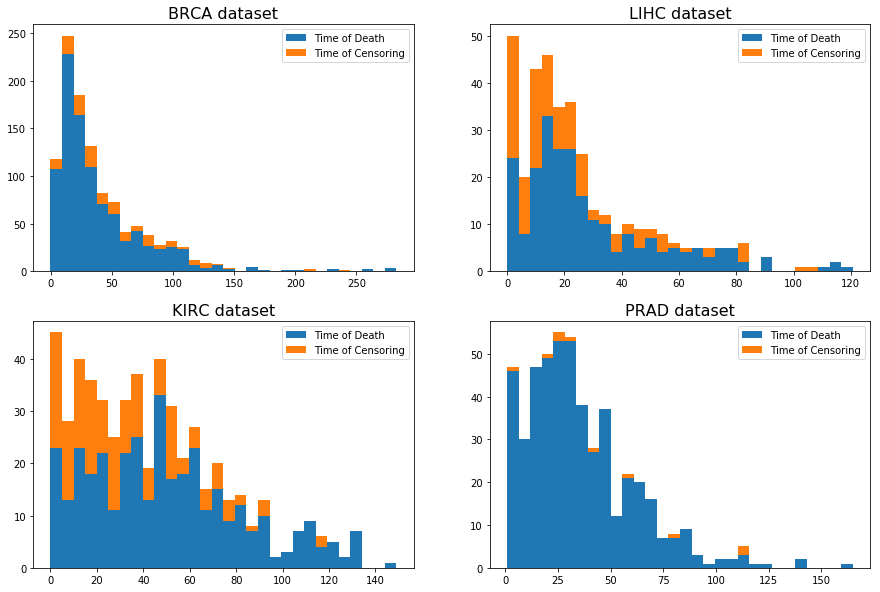

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
fig.suptitle('', fontsize=20)

plt.subplot(2, 2, 1)

val, bins, patches = plt.hist((brca_event_time_array["overall_survival_months"][brca_event_time_array["status"]],
                               brca_event_time_array["overall_survival_months"][~brca_event_time_array["status"]]),
                              bins=30, stacked=True)
plt.title('BRCA dataset', fontsize=16)
plt.legend(patches, ["Time of Death", "Time of Censoring"])

plt.subplot(2, 2, 2)

val, bins, patches = plt.hist((lihc_event_time_array["overall_survival_months"][lihc_event_time_array["status"]],
                               lihc_event_time_array["overall_survival_months"][~lihc_event_time_array["status"]]),
                              bins=30, stacked=True)
plt.title('LIHC dataset', fontsize=16)
plt.legend(patches, ["Time of Death", "Time of Censoring"])

plt.subplot(2, 2, 3)

val, bins, patches = plt.hist((kirc_event_time_array["overall_survival_months"][kirc_event_time_array["status"]],
                               kirc_event_time_array["overall_survival_months"][~kirc_event_time_array["status"]]),
                              bins=30, stacked=True)
plt.title('KIRC dataset', fontsize=16)
plt.legend(patches, ["Time of Death", "Time of Censoring"])

plt.subplot(2, 2, 4)

val, bins, patches = plt.hist((prad_event_time_array["overall_survival_months"][prad_event_time_array["status"]],
                               prad_event_time_array["overall_survival_months"][~prad_event_time_array["status"]]),
                              bins=30, stacked=True)
plt.title('PRAD dataset', fontsize=16)
plt.legend(patches, ["Time of Death", "Time of Censoring"])


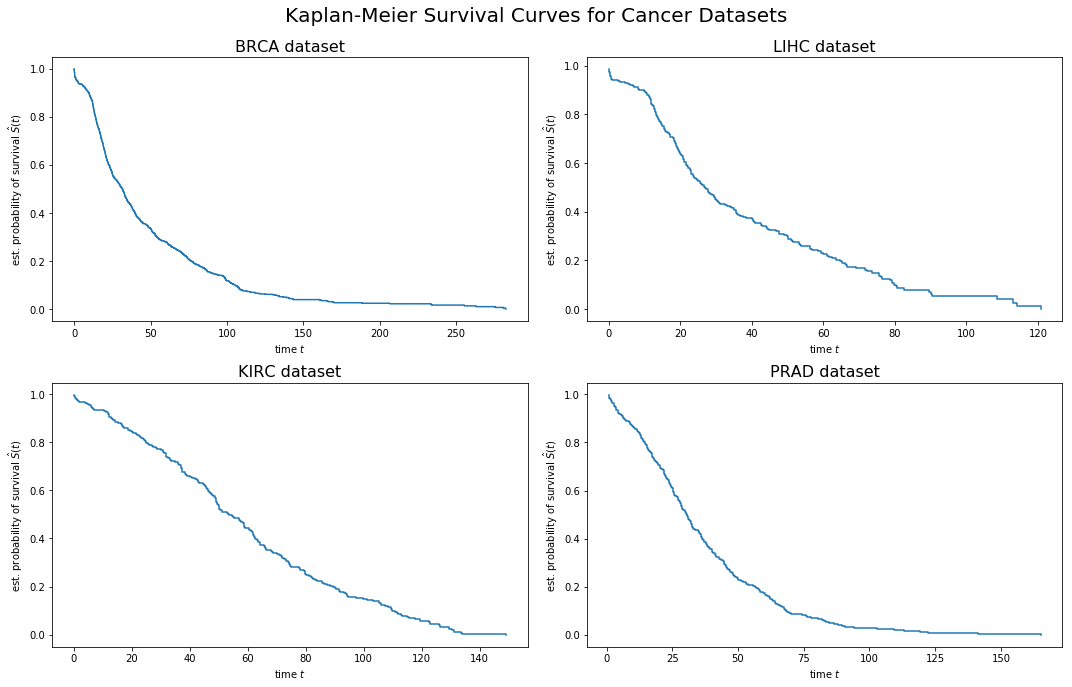

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
fig.suptitle('Kaplan-Meier Survival Curves for Cancer Datasets', fontsize=20)

plt.subplot(2, 2, 1)
time, survival_prob = kaplan_meier_estimator(brca_event_time_array["status"], brca_event_time_array["overall_survival_months"])
plt.step(time, survival_prob, where="post")
plt.title('BRCA dataset', fontsize=16)
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

plt.subplot(2, 2, 2)
time, survival_prob = kaplan_meier_estimator(lihc_event_time_array["status"], lihc_event_time_array["overall_survival_months"])
plt.step(time, survival_prob, where="post")
plt.title('LIHC dataset', fontsize=16)
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

plt.subplot(2, 2, 3)
time, survival_prob = kaplan_meier_estimator(kirc_event_time_array["status"], kirc_event_time_array["overall_survival_months"])
plt.step(time, survival_prob, where="post")
plt.title('KIRC dataset', fontsize=16)
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

plt.subplot(2, 2, 4)
time, survival_prob = kaplan_meier_estimator(prad_event_time_array["status"], prad_event_time_array["overall_survival_months"])
plt.step(time, survival_prob, where="post")
plt.title('PRAD dataset', fontsize=16)
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:
parameters = [x/50 for x in range(1,50)]


In [ ]:
parameters_dict = {'l1_ratio': parameters}

In [ ]:
brca_concordance_scores = train_survival_model(
    brca_filtered_ssgsea_df,
    brca_event_time_array,
    5,
    5,
    parameters_dict
)

In [ ]:
brca_concordance_scores

In [ ]:
2. ** np.arange(-12, 13, 2)

In [ ]:
brca_scores_df = pd.DataFrame(brca_concordance_scores)

In [ ]:
brca_scores_df

In [ ]:
brca_scores_split = brca_scores_df[["l1-ratio","c-index","split"]].copy()

In [ ]:
brca_scores_split

In [ ]:
order = brca_scores_split["l1-ratio"].tolist()

In [ ]:
brca_scores_split

In [ ]:
ax = sns.boxplot(x="l1-ratio", y="c-index", 
                 data=brca_scores_df, showfliers=False,
                 palette="Set2", order=order).set_title('l1 ratio vs c-index',fontsize=14)


plt.xlabel('L1-ratio', fontsize=13)
plt.ylabel('c-index', fontsize=13)


plt.Figure(figsize=(10,20))
#plt.savefig('all_dbs_boxplot.png', dpi=500)

In [ ]:
np.mean(brca_concordance_scores)

In [ ]:
lihc_concordance_scores = train_survival_model(
    lihc_filtered_ssgsea_df,
    event_time_array_lihc,
    10,
    10,
    parameters_dict
)

In [ ]:
lihc_concordance_scores

In [ ]:
np.mean(lihc_concordance_scores)